In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/3 [=========>....................] - ETA: 2s - loss: 2.3258 - accuracy: 0.1484
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 2s 222ms/step - loss: 2.3145 - accuracy: 0.1498 - val_loss: 2.3020 - val_accuracy: 0.1348
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2679 - accuracy: 0.1484
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 2.2812 - accuracy: 0.1723 - val_loss: 2.2855 - val_accuracy: 0.1573
Epoch 3/1000


C:\Users\daadh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/3 [=========>....................] - ETA: 0s - loss: 2.2410 - accuracy: 0.2031
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 60ms/step - loss: 2.2464 - accuracy: 0.2022 - val_loss: 2.2724 - val_accuracy: 0.1685
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2540 - accuracy: 0.2656
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 2.2397 - accuracy: 0.2097 - val_loss: 2.2613 - val_accuracy: 0.1798
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2187 - accuracy: 0.1562
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 60ms/step - loss: 2.2195 - accuracy: 0.1760 - val_loss: 2.2498 - val_accuracy: 0.1798
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2184 - accuracy: 0.2500
Epoch 6: saving model to 

3/3 [==============================] - 0s 57ms/step - loss: 1.9268 - accuracy: 0.2996 - val_loss: 2.0014 - val_accuracy: 0.2472
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0132 - accuracy: 0.2656
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.9542 - accuracy: 0.3146 - val_loss: 1.9921 - val_accuracy: 0.2472
Epoch 32/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9395 - accuracy: 0.3438
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.9818 - accuracy: 0.2959 - val_loss: 1.9839 - val_accuracy: 0.2584
Epoch 33/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9144 - accuracy: 0.4219
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.9129 - accuracy: 0.3745 - val_loss: 1.

Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6907 - accuracy: 0.3594
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.6774 - accuracy: 0.3783 - val_loss: 1.6987 - val_accuracy: 0.3933
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7472 - accuracy: 0.3281
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.6837 - accuracy: 0.3895 - val_loss: 1.6883 - val_accuracy: 0.3933
Epoch 60/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7112 - accuracy: 0.3828
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.6944 - accuracy: 0.3933 - val_loss: 1.6765 - val_accuracy: 0.3933
Epoch 61/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7381 - accuracy: 0.3906
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.4121 - accuracy: 0.4453
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.4625 - accuracy: 0.4532 - val_loss: 1.3772 - val_accuracy: 0.5393
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5410 - accuracy: 0.3281
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 59ms/step - loss: 1.4955 - accuracy: 0.4007 - val_loss: 1.3688 - val_accuracy: 0.4719
Epoch 87/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4740 - accuracy: 0.4609
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.4285 - accuracy: 0.4607 - val_loss: 1.3628 - val_accuracy: 0.4494
Epoch 88/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4568 - accuracy: 0.4453
Epoch 88: saving mo

1/3 [=========>....................] - ETA: 0s - loss: 1.3088 - accuracy: 0.4688
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 1.3337 - accuracy: 0.4382 - val_loss: 1.1805 - val_accuracy: 0.5730
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3090 - accuracy: 0.3984
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.3524 - accuracy: 0.4195 - val_loss: 1.1729 - val_accuracy: 0.5393
Epoch 114/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3221 - accuracy: 0.4531
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 1.3509 - accuracy: 0.4419 - val_loss: 1.1679 - val_accuracy: 0.5393
Epoch 115/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3162 - accuracy: 0.4609
Epoch 115: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.1813 - accuracy: 0.5078
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 1.2168 - accuracy: 0.5094 - val_loss: 1.0703 - val_accuracy: 0.7416
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2123 - accuracy: 0.5156
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 1.2087 - accuracy: 0.5318 - val_loss: 1.0629 - val_accuracy: 0.7528
Epoch 141/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2440 - accuracy: 0.4688
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.1947 - accuracy: 0.4981 - val_loss: 1.0594 - val_accuracy: 0.7528
Epoch 142/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2796 - accuracy: 0.4219
Epoch 142: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.1239 - accuracy: 0.4922
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.1249 - accuracy: 0.5206 - val_loss: 0.9797 - val_accuracy: 0.6067
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1471 - accuracy: 0.4922
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.1516 - accuracy: 0.5056 - val_loss: 0.9771 - val_accuracy: 0.6067
Epoch 168/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1715 - accuracy: 0.5469
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.1751 - accuracy: 0.5206 - val_loss: 0.9687 - val_accuracy: 0.6067
Epoch 169/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2081 - accuracy: 0.4688
Epoch 169: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.1104 - accuracy: 0.5000
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 1.0624 - accuracy: 0.5506 - val_loss: 0.9128 - val_accuracy: 0.6742
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1875 - accuracy: 0.4766
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.0831 - accuracy: 0.5880 - val_loss: 0.9090 - val_accuracy: 0.6629
Epoch 195/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1482 - accuracy: 0.5625
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.1029 - accuracy: 0.5618 - val_loss: 0.9051 - val_accuracy: 0.6629
Epoch 196/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0694 - accuracy: 0.5234
Epoch 196: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.1121 - accuracy: 0.5625
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 1.0988 - accuracy: 0.5393 - val_loss: 0.8142 - val_accuracy: 0.9213
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0651 - accuracy: 0.5938
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 1.0486 - accuracy: 0.5843 - val_loss: 0.8108 - val_accuracy: 0.9213
Epoch 222/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1183 - accuracy: 0.5078
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.0454 - accuracy: 0.5730 - val_loss: 0.8076 - val_accuracy: 0.9213
Epoch 223/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0621 - accuracy: 0.5625
Epoch 223: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9453 - accuracy: 0.6484
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 0.9635 - accuracy: 0.6030 - val_loss: 0.7929 - val_accuracy: 0.8539
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0491 - accuracy: 0.5625
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 0.9864 - accuracy: 0.5768 - val_loss: 0.7934 - val_accuracy: 0.8539
Epoch 249/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0353 - accuracy: 0.6016
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 59ms/step - loss: 1.0186 - accuracy: 0.5693 - val_loss: 0.7903 - val_accuracy: 0.8539
Epoch 250/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0028 - accuracy: 0.5312
Epoch 250: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9421 - accuracy: 0.5938
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 0.9453 - accuracy: 0.6180 - val_loss: 0.7267 - val_accuracy: 0.8539
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0600 - accuracy: 0.5625
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 0.9681 - accuracy: 0.6030 - val_loss: 0.7240 - val_accuracy: 0.8539
Epoch 276/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9524 - accuracy: 0.6094
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 0.9566 - accuracy: 0.6180 - val_loss: 0.7177 - val_accuracy: 0.8539
Epoch 277/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0145 - accuracy: 0.5547
Epoch 277: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9819 - accuracy: 0.5469
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 0.9585 - accuracy: 0.5393 - val_loss: 0.6794 - val_accuracy: 0.8539
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9718 - accuracy: 0.5781
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.9866 - accuracy: 0.5730 - val_loss: 0.6764 - val_accuracy: 0.8539
Epoch 303/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9157 - accuracy: 0.6094
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 53ms/step - loss: 0.9325 - accuracy: 0.6105 - val_loss: 0.6765 - val_accuracy: 0.8539
Epoch 304/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8734 - accuracy: 0.6484
Epoch 304: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8895 - accuracy: 0.7031
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 59ms/step - loss: 0.9336 - accuracy: 0.6330 - val_loss: 0.6584 - val_accuracy: 0.8427
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0105 - accuracy: 0.5625
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 0.9231 - accuracy: 0.6217 - val_loss: 0.6524 - val_accuracy: 0.8427
Epoch 330/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8597 - accuracy: 0.6797
Epoch 330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 0.9118 - accuracy: 0.6442 - val_loss: 0.6446 - val_accuracy: 0.8539
Epoch 331/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9009 - accuracy: 0.6172
Epoch 331: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8767 - accuracy: 0.6094
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 0.8516 - accuracy: 0.6292 - val_loss: 0.6032 - val_accuracy: 0.8539
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7776 - accuracy: 0.6797
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 0.8098 - accuracy: 0.6554 - val_loss: 0.6019 - val_accuracy: 0.8539
Epoch 357/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8826 - accuracy: 0.6797
Epoch 357: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 53ms/step - loss: 0.8890 - accuracy: 0.6517 - val_loss: 0.5991 - val_accuracy: 0.8539
Epoch 358/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8073 - accuracy: 0.6406
Epoch 358: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8120 - accuracy: 0.6719
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 0.7995 - accuracy: 0.6629 - val_loss: 0.5952 - val_accuracy: 0.8989
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8425 - accuracy: 0.6406
Epoch 383: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 0.8387 - accuracy: 0.6479 - val_loss: 0.5934 - val_accuracy: 0.8989
Epoch 384/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8858 - accuracy: 0.6641
Epoch 384: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 0.8367 - accuracy: 0.6742 - val_loss: 0.5950 - val_accuracy: 0.8764
Epoch 385/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8583 - accuracy: 0.6406
Epoch 385: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8077 - accuracy: 0.6328
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 0.8324 - accuracy: 0.6629 - val_loss: 0.5356 - val_accuracy: 0.8539
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8968 - accuracy: 0.6250
Epoch 410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 0.8504 - accuracy: 0.6779 - val_loss: 0.5341 - val_accuracy: 0.8539
Epoch 411/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8214 - accuracy: 0.7266
Epoch 411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 0.8177 - accuracy: 0.6742 - val_loss: 0.5311 - val_accuracy: 0.8539
Epoch 412/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8311 - accuracy: 0.6875
Epoch 412: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 37ms/step - loss: 0.5294 - accuracy: 0.9213


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 155ms/step
[3.1217455e-04 5.9783175e-03 1.6174712e-03 6.2437681e-04 1.6810805e-04
 4.6536283e-04 6.9304317e-01 7.7744700e-02 9.3601942e-02 1.2644432e-01]
6


# Confusion matrix

3/3 [==============================] - 0s 3ms/step


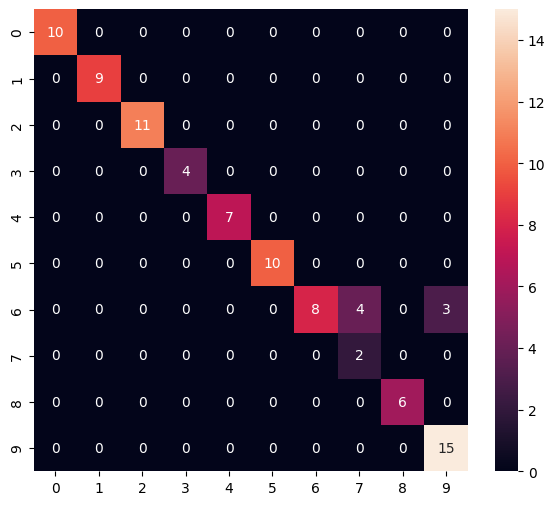

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        10
           6       1.00      0.53      0.70        15
           7       0.33      1.00      0.50         2
           8       1.00      1.00      1.00         6
           9       0.83      1.00      0.91        15

    accuracy                           0.92        89
   macro avg       0.92      0.95      0.91        89
weighted avg       0.96      0.92      0.92        89



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\daadh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\daadh\AppData\Local\Temp\tmphkfvg6lr\assets


INFO:tensorflow:Assets written to: C:\Users\daadh\AppData\Local\Temp\tmphkfvg6lr\assets


6808

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.02 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1217441e-04 5.9783147e-03 1.6174713e-03 6.2437652e-04 1.6810790e-04
 4.6536239e-04 6.9304323e-01 7.7744670e-02 9.3601950e-02 1.2644431e-01]
6
